In [1]:
import pandas as pd
import numpy as np

import sys, os
sys.path.append(os.path.abspath("../src"))

In [2]:
# Visualisering av årlig temperatur
from temp_visualisering import plot_interactive_bokeh
from statistikk import analyser_fil

stat_dict, _, _ = analyser_fil(
    filsti="../data/temp_gloshaugen_historisk_renset_ 50.csv",
    sep=",",
    datokolonne="tidspunkt",
    groupby="år"
)

årlig_df = stat_dict["temperatur"]
årlig_df = årlig_df[årlig_df["år"] < 2025]

plot_interactive_bokeh(årlig_df)

Loading BokehJS ...

c:\Users\idunn\OneDrive - NTNU\TDT4114\Mappe\src\temp_visualisering.py:125: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'none'}` instead.

  ax = sns.barplot(


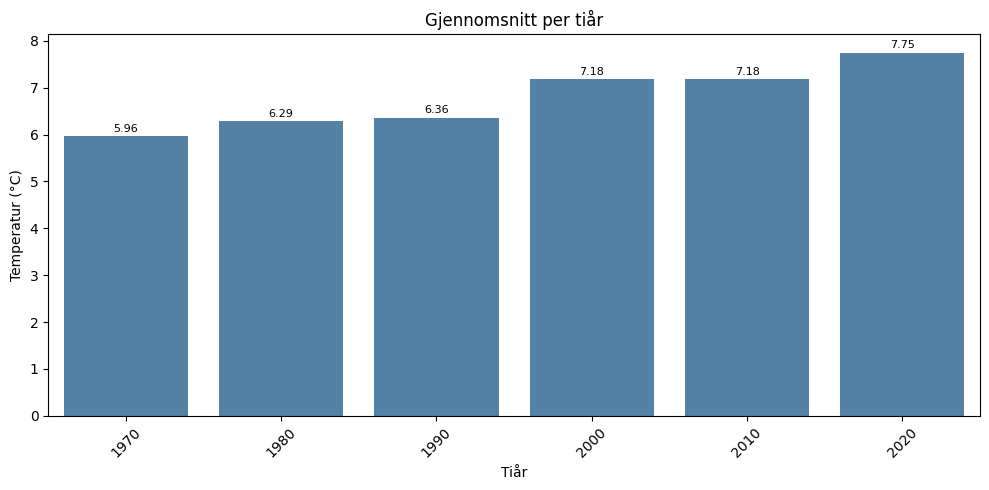

In [3]:
# Visualisering av gjennomsnittstemperatur per tiår
from statistikk import tiår_snitt
from temp_visualisering import plot_by_decade

filtrert_df = årlig_df[årlig_df["år"] < 2025]
tiår_df = tiår_snitt(filtrert_df, årskolonne="år", verdikolonne="gjennomsnitt")
plot_by_decade(tiår_df)

In [4]:
# Visualisering av klimagass-utslipp i Norge 
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(''), '..', 'src')))

from klimagass_visualisering import analyser_og_vis
analyser_og_vis("../data/klimagassutslipp_norge_renset.csv", datokolonne="år", groupby="år")


ModuleNotFoundError: No module named 'dataanalyse'


Analyse av:../data/klimagassutslipp_norge_renset.csv
-------------------------------------------------

Analyse av:../data/klimagassutslipp_verden_renset.csv
-------------------------------------------------


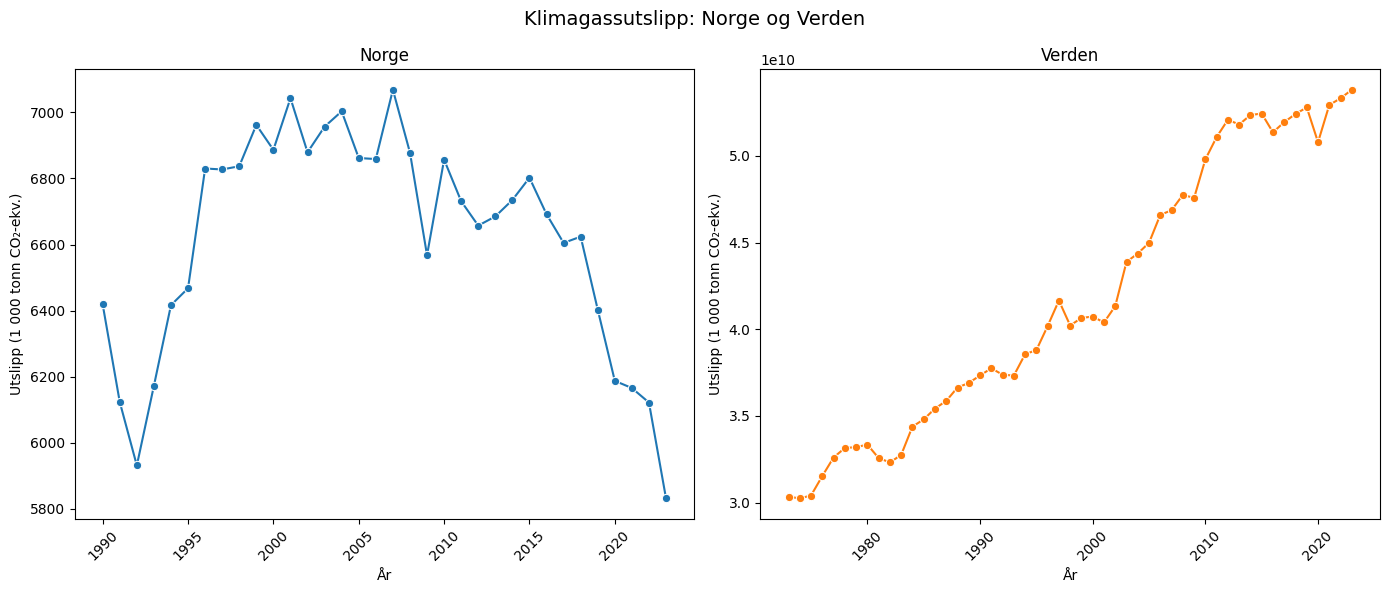

In [ ]:
import importlib
import klimagass_visualisering
importlib.reload(klimagass_visualisering)

from klimagass_visualisering import sammenlign_norge_og_verden_separat
sammenlign_norge_og_verden_separat(
    "../data/klimagassutslipp_norge_renset.csv",
    "../data/klimagassutslipp_verden_renset.csv"
)

In [ ]:
import importlib
import klimagass_visualisering
importlib.reload(klimagass_visualisering)


sammenlign_norge_og_verden_sammen(
    "../data/klimagassutslipp_norge_renset.csv",
    "../data/klimagassutslipp_verden_renset.csv"
)


Analyse av:../data/klimagassutslipp_norge_renset.csv
-------------------------------------------------

Analyse av:../data/klimagassutslipp_norge_renset.csv
-------------------------------------------------


NameError: name 'sammenlign_norge_og_verden_sammen' is not defined


Analyse av:../data/klimagassutslipp_norge_renset.csv
-------------------------------------------------


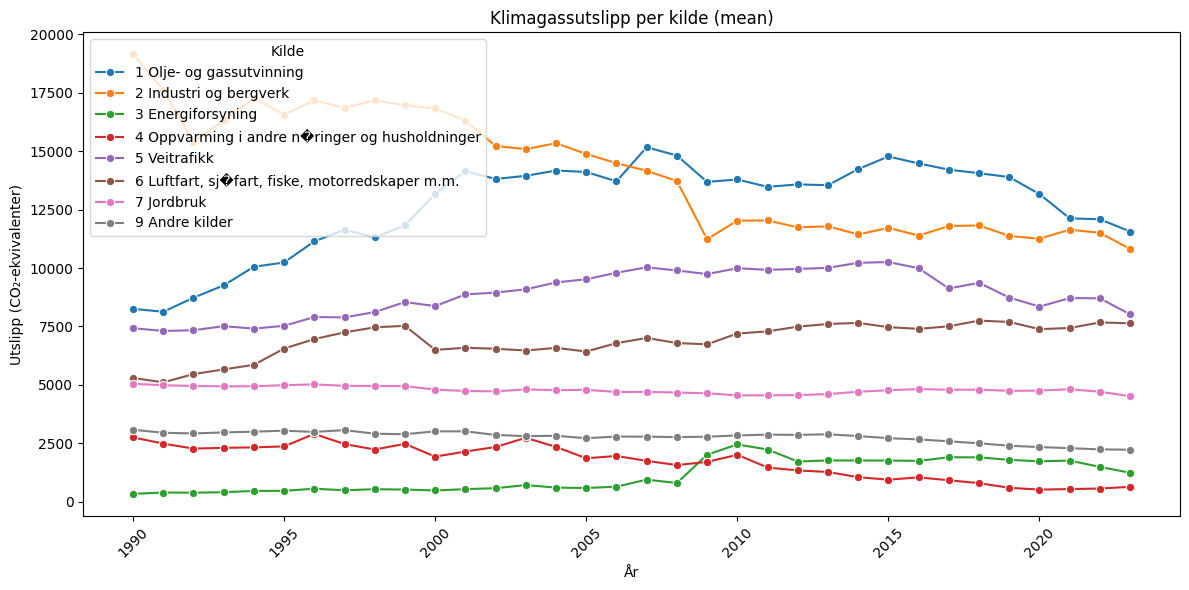

In [ ]:
import dataanalyse
import importlib
importlib.reload(dataanalyse)
statistikk, df_total, df = dataanalyse.analyser_fil("../data/klimagassutslipp_norge_renset.csv",sep=",",datokolonne="år",groupby="år")

from klimagass_visualisering import plott_utslipp_per_kilde_over_tid

kol_utslipp = [kol for kol in df.columns if "utslipp" in kol and "co2" in kol][0]
df[kol_utslipp] = pd.to_numeric(df[kol_utslipp], errors="coerce")
df = df[~df['kilde_(aktivitet)'].str.contains("alle kilder", case=False)]

stats_per_kilde_år = df.groupby(['kilde_(aktivitet)', 'år'])[kol_utslipp].agg(['mean', 'median']).reset_index()
stats_per_kilde_år = stats_per_kilde_år.round(2)

plott_utslipp_per_kilde_over_tid(stats_per_kilde_år, verdi_kolonne="mean")
